In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

2023-03-03 22:14:08.893820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 22:14:09.032806: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-03 22:14:09.036832: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-03 22:14:09.036859: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [50]:
train_dir = '/home/local/ZOHOCORP/kishore-pt5635/Desktop/College/PaddyDisease/DataSets/Disease_Classifior/Train'
batch_size = 16
img_dim = 128

In [51]:
img_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0, 
    validation_split=0.1,
    rotation_range=5,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
)

In [52]:
train_gen = img_datagen.flow_from_directory(
    train_dir,
    subset="training",
    seed=42,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    class_mode="categorical",
)

Found 9370 images belonging to 10 classes.


In [53]:
valid_gen = img_datagen.flow_from_directory(
    train_dir,
    subset="validation",
    seed=42,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    class_mode="categorical",
)

Found 1036 images belonging to 10 classes.


In [54]:
print(train_gen.class_indices)
print(len(train_gen.class_indices))
N_CLASS = len(train_gen.class_indices)

{'bacterial_leaf_blight': 0, 'bacterial_leaf_streak': 1, 'bacterial_panicle_blight': 2, 'blast': 3, 'brown_spot': 4, 'dead_heart': 5, 'downy_mildew': 6, 'hispa': 7, 'normal': 8, 'tungro': 9}
10


In [55]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(img_dim, img_dim, 3)),
tf.keras.layers.Conv2D(16, (3,3), activation='relu' ),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(N_CLASS, activation='softmax')
])

In [56]:
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png',expand_nested=True,show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)      

In [58]:
EPOCH = 100

In [59]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=5,
                            verbose=0, 
                            mode='auto')

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                            factor=0.5,
                            patience=5)

callbacks = [early_stopping_callback, lr_reducer]

In [60]:
model.compile(
        #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
        optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy'])

In [61]:
history_model = model.fit(
        train_gen,
        epochs=EPOCH,
        validation_data = valid_gen,
        callbacks=callbacks,
    )

Epoch 1/100
586/586 [==============================] - 93s 157ms/step - loss: 1.9704 - accuracy: 0.2866 - val_loss: 1.7797 - val_accuracy: 0.3736 - lr: 3.0000e-04
Epoch 2/100
586/586 [==============================] - 87s 148ms/step - loss: 1.6619 - accuracy: 0.4091 - val_loss: 1.5138 - val_accuracy: 0.4730 - lr: 3.0000e-04
Epoch 3/100
586/586 [==============================] - 76s 130ms/step - loss: 1.4280 - accuracy: 0.4965 - val_loss: 1.2815 - val_accuracy: 0.5560 - lr: 3.0000e-04
Epoch 4/100
586/586 [==============================] - 76s 129ms/step - loss: 1.2263 - accuracy: 0.5732 - val_loss: 1.1546 - val_accuracy: 0.6052 - lr: 3.0000e-04
Epoch 5/100
586/586 [==============================] - 75s 127ms/step - loss: 1.0505 - accuracy: 0.6374 - val_loss: 0.9897 - val_accuracy: 0.6525 - lr: 3.0000e-04
Epoch 6/100
586/586 [==============================] - 76s 129ms/step - loss: 0.8828 - accuracy: 0.7006 - val_loss: 0.8788 - val_accuracy: 0.7181 - lr: 3.0000e-04
Epoch 7/100
586/586 [=

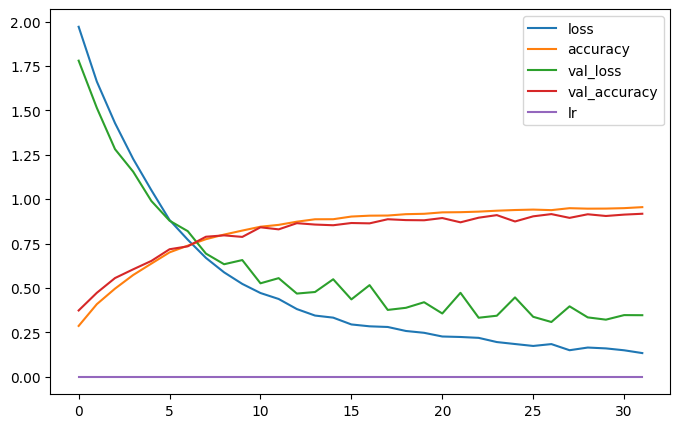

In [62]:
pd.DataFrame(history_model.history).plot(figsize=(8,5))
plt.show()

In [63]:
tf.keras.models.save_model(model, "ClassPredictor.h5") 

In [145]:
loaded_model = tf.keras.models.load_model('ClassPredictor.h5')
print("model Loaded")

model Loaded


In [146]:
test_path = '/home/local/ZOHOCORP/kishore-pt5635/Desktop/College/PaddyDisease/DataSets/Disease_Classifior/Test1'
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255).flow_from_directory(    
    directory=test_path,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    classes=['.'],
    shuffle=False,
)

Found 10 images belonging to 1 classes.


In [147]:
predict = loaded_model.predict(test_gen, verbose=1)

1/1 [==============================] - 0s 325ms/step


In [148]:
print(predict)

[[3.49541951e-05 6.35126978e-03 2.93509220e-03 2.37069368e-01
  4.36765607e-03 2.89973832e-04 1.10210012e-05 7.83906580e-06
  5.55061742e-05 7.48877287e-01]
 [9.97765124e-01 2.02785712e-04 4.53949013e-07 3.59679434e-05
  1.89069251e-03 9.93192880e-05 1.81725787e-10 9.83357467e-08
  5.45814009e-06 1.36574485e-09]
 [3.46610496e-09 9.99999821e-01 5.91278068e-12 1.14844967e-10
  7.91096022e-10 1.31016491e-11 6.83209025e-15 2.36039580e-15
  3.73717064e-11 8.98110812e-08]
 [5.53705490e-07 2.45184602e-08 9.92666960e-01 2.68926306e-05
  1.12886016e-06 3.41187627e-03 7.69337639e-04 3.20838378e-09
  3.12316441e-03 3.13604698e-09]
 [1.29688444e-04 4.24498430e-05 5.33937555e-06 7.99526970e-05
  9.90120351e-01 9.50454734e-03 3.15384163e-08 4.81445625e-07
  3.95379902e-05 7.73920765e-05]
 [5.34080304e-02 5.31773821e-07 5.59763066e-05 4.79067057e-05
  3.64223561e-05 9.45118904e-01 3.07211085e-05 3.44026957e-05
  2.94589540e-07 1.26671069e-03]
 [2.49136844e-09 7.24409617e-08 6.06415824e-07 1.16716032e

In [149]:
predicted_class_indices=np.argmax(predict,axis=1)
print(set(predicted_class_indices))

inv_map = {v:k for k,v in train_gen.class_indices.items()}

predictions = [inv_map[k] for k in predicted_class_indices]

{0, 1, 2, 4, 5, 6, 7, 8, 9}


In [150]:
filenames=test_gen.filenames

results=pd.DataFrame({"image_id":filenames,
                      "label":predictions})
results.image_id = results.image_id.str.replace('./', '')
results.to_csv("submission.csv",index=False)
print(results)

  image_id                     label
0    B.jpg                    tungro
1  BLB.jpg     bacterial_leaf_blight
2  BLS.jpg     bacterial_leaf_streak
3  BPB.jpg  bacterial_panicle_blight
4   BS.jpg                brown_spot
5   DH.jpg                dead_heart
6   DM.jpg              downy_mildew
7    H.jpg                     hispa
8    N.jpg                    normal
9    T.jpg                    tungro


/tmp/ipykernel_60348/2422654128.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  results.image_id = results.image_id.str.replace('./', '')


In [151]:
results['label'].value_counts()

tungro                      2
bacterial_leaf_blight       1
bacterial_leaf_streak       1
bacterial_panicle_blight    1
brown_spot                  1
dead_heart                  1
downy_mildew                1
hispa                       1
normal                      1
Name: label, dtype: int64

In [171]:
test_path = '/home/local/ZOHOCORP/kishore-pt5635/Desktop/College/PaddyDisease/DataSets/Disease_Classifior/Train/bacterial_leaf_blight/'
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255).flow_from_directory(    
    directory=test_path,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    classes=['.'],
    shuffle=False,
)

Found 479 images belonging to 1 classes.


In [172]:
loss, accuracy = loaded_model.evaluate(test_gen)

30/30 [==============================] - 3s 97ms/step - loss: 116.5420 - accuracy: 0.9186


In [174]:
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 91.86%
